In [18]:
# single linear regression and validation

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load the dataset
df = pd.read_csv("cleaned_stock_data_no_nan.csv")

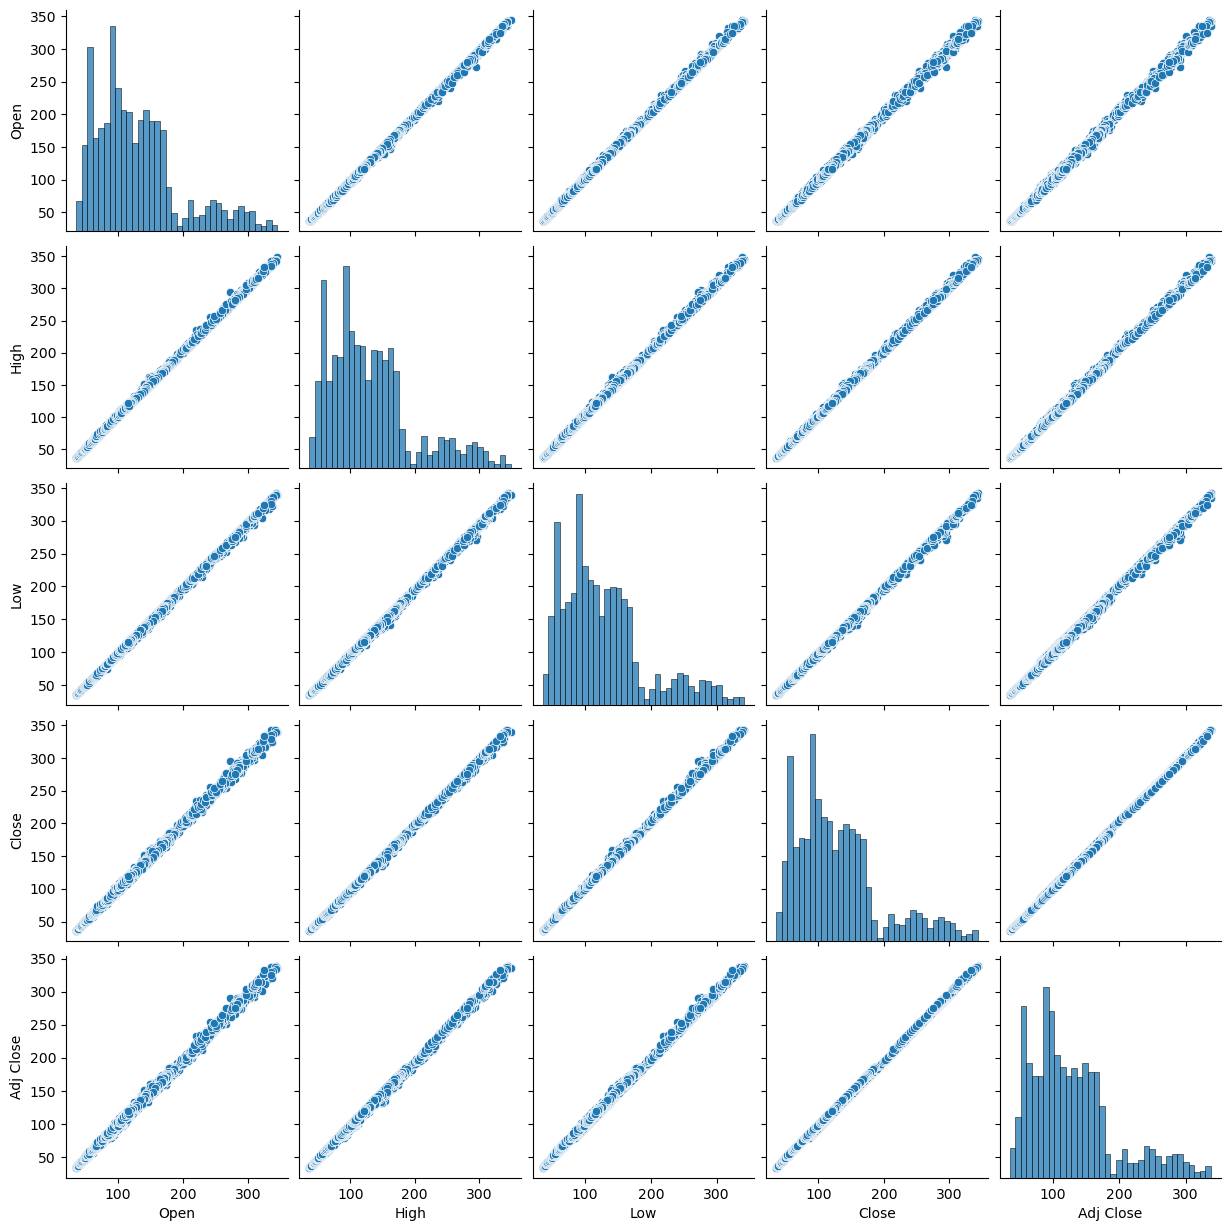

In [19]:
# Repeat pairplot specifically on the prices 

# Select the columns 'Open', 'High', 'Low', 'Close', 'Adj Close'
price = df[['Open', 'High', 'Low', 'Close', 'Adj Close']]

# Create the pairplot
sns.pairplot(price)
plt.show()

**Choose the candidate model**

$$
\hat{y} = \beta_0 + \beta_1 \cdot \hat{X} + \epsilon
$$

where:
- $\hat{y}$ represents the predicted value: `High`, `Low`, `Close`, `Adj Close`, `Volume`, `Daily Return`
- $\beta_0, \beta_1$ are the regression coefficients
- The features $\hat{X}$ are `Open`, `High`, `Low`, `Close`, `Adj Close`, `Volume` as independent variables

**A baseline model**

A baseline is to predict the average value of the output, $\overline{\texttt{W}}$, for any value of the input. This brings us to three models:

$$
\hat{y} = E(\hat{y}) + \epsilon.
$$

In [20]:
# Define the sets of data for regression
regression_sets = [
    ("Open", "High"),
    ("Open", "Low"),
    ("Open", "Close"),
    ("Open", "Adj Close"),
    ("High", "Low"),
    ("High", "Close"),
    ("High", "Adj Close"),
    ("Low", "Close"),
    ("Low", "Adj Close"),
    ("Close", "Adj Close")
]

In [6]:
# Iterate over each set and perform regression
for feature, dependence in regression_sets:
    X = df[feature].values.reshape(-1, 1)
    y = df[dependence].values

    # Split the data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create and fit the linear regression model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Evaluate the model on the test set
    score = model.score(X_test, y_test)

    # Print the evaluation results
    print(f"Regression: {feature} -> {dependence}")
    print("Train set size:", len(X_train))
    print("Test set size:", len(X_test))
    print("Coefficient:", model.coef_)
    print("Intercept:", model.intercept_)
    print("R^2 Score:", score)
    print("---------------------------")

Regression: Open -> High
Train set size: 4192
Test set size: 1049
Coefficient: [1.01002767]
Intercept: 0.19191866474142216
R^2 Score: 0.9995490957568038
---------------------------
Regression: Open -> Low
Train set size: 4192
Test set size: 1049
Coefficient: [0.98900284]
Intercept: -0.08204635834326268
R^2 Score: 0.9994521096468034
---------------------------
Regression: Open -> Close
Train set size: 4192
Test set size: 1049
Coefficient: [0.99982967]
Intercept: 0.070558217101933
R^2 Score: 0.9988531878769532
---------------------------
Regression: Open -> Adj Close
Train set size: 4192
Test set size: 1049
Coefficient: [0.98676629]
Intercept: 0.35119532399625086
R^2 Score: 0.9980376637594235
---------------------------
Regression: High -> Low
Train set size: 4192
Test set size: 1049
Coefficient: [0.97886237]
Intercept: -0.22756253567084173
R^2 Score: 0.9993384593256922
---------------------------
Regression: High -> Close
Train set size: 4192
Test set size: 1049
Coefficient: [0.98996512

In [22]:
# baseline model

# Calculate the mean of the target variable in the training dataset
mean_target = np.mean(y_train)

# Create an array of the same length as the test dataset, containing the mean value
baseline_predictions = np.full_like(y_test, mean_target)

# Evaluate the performance of the mean baseline model
mse = mean_squared_error(y_test, baseline_predictions)
mae = mean_absolute_error(y_test, baseline_predictions)
r2 = r2_score(y_test, baseline_predictions)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared Score: {r2:.2f}")

Mean Squared Error (MSE): 4041.13
Mean Absolute Error (MAE): 48.91
R-squared Score: -0.00


In [5]:
# k-fold cross validation

import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression

# Load the dataset
df = pd.read_csv("cleaned_stock_data_no_nan.csv")

# Define the sets of data for regression
regression_sets = [
    ("Open", "High"),
    ("Open", "Low"),
    ("Open", "Close"),
    ("Open", "Adj Close"),
    ("High", "Low"),
    ("High", "Close"),
    ("High", "Adj Close"),
    ("Low", "Close"),
    ("Low", "Adj Close"),
    ("Close", "Adj Close")
]

# Set the number of folds for cross-validation
k = 5

# Iterate over each set and perform regression with k-fold cross-validation
for feature, dependence in regression_sets:
    X = df[feature].values.reshape(-1, 1)
    y = df[dependence].values

    # Create the KFold object
    kf = KFold(n_splits=k, shuffle=True, random_state=42)

    # Initialize lists to store the evaluation scores for each fold
    r2_scores = []

    # Perform k-fold cross-validation
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Create and fit the linear regression model
        model = LinearRegression()
        model.fit(X_train, y_train)

        # Evaluate the model on the test set
        score = model.score(X_test, y_test)
        r2_scores.append(score)

    # Compute the average R-squared score across all folds
    average_r2 = np.mean(r2_scores)

    # Print the evaluation results
    print(f"Regression: {feature} -> {dependence}")
    print("Number of folds:", k)
    print("Average R^2 Score:", average_r2)
    print("---------------------------")

Regression: Open -> High
Number of folds: 5
Average R^2 Score: 0.9995101931275329
---------------------------
Regression: Open -> Low
Number of folds: 5
Average R^2 Score: 0.9994433113551271
---------------------------
Regression: Open -> Close
Number of folds: 5
Average R^2 Score: 0.9988110284988897
---------------------------
Regression: Open -> Adj Close
Number of folds: 5
Average R^2 Score: 0.9980448883654098
---------------------------
Regression: High -> Low
Number of folds: 5
Average R^2 Score: 0.9992910073747872
---------------------------
Regression: High -> Close
Number of folds: 5
Average R^2 Score: 0.9994234770260194
---------------------------
Regression: High -> Adj Close
Number of folds: 5
Average R^2 Score: 0.9987427203484633
---------------------------
Regression: Low -> Close
Number of folds: 5
Average R^2 Score: 0.9994498894264889
---------------------------
Regression: Low -> Adj Close
Number of folds: 5
Average R^2 Score: 0.9986263718784748
------------------------

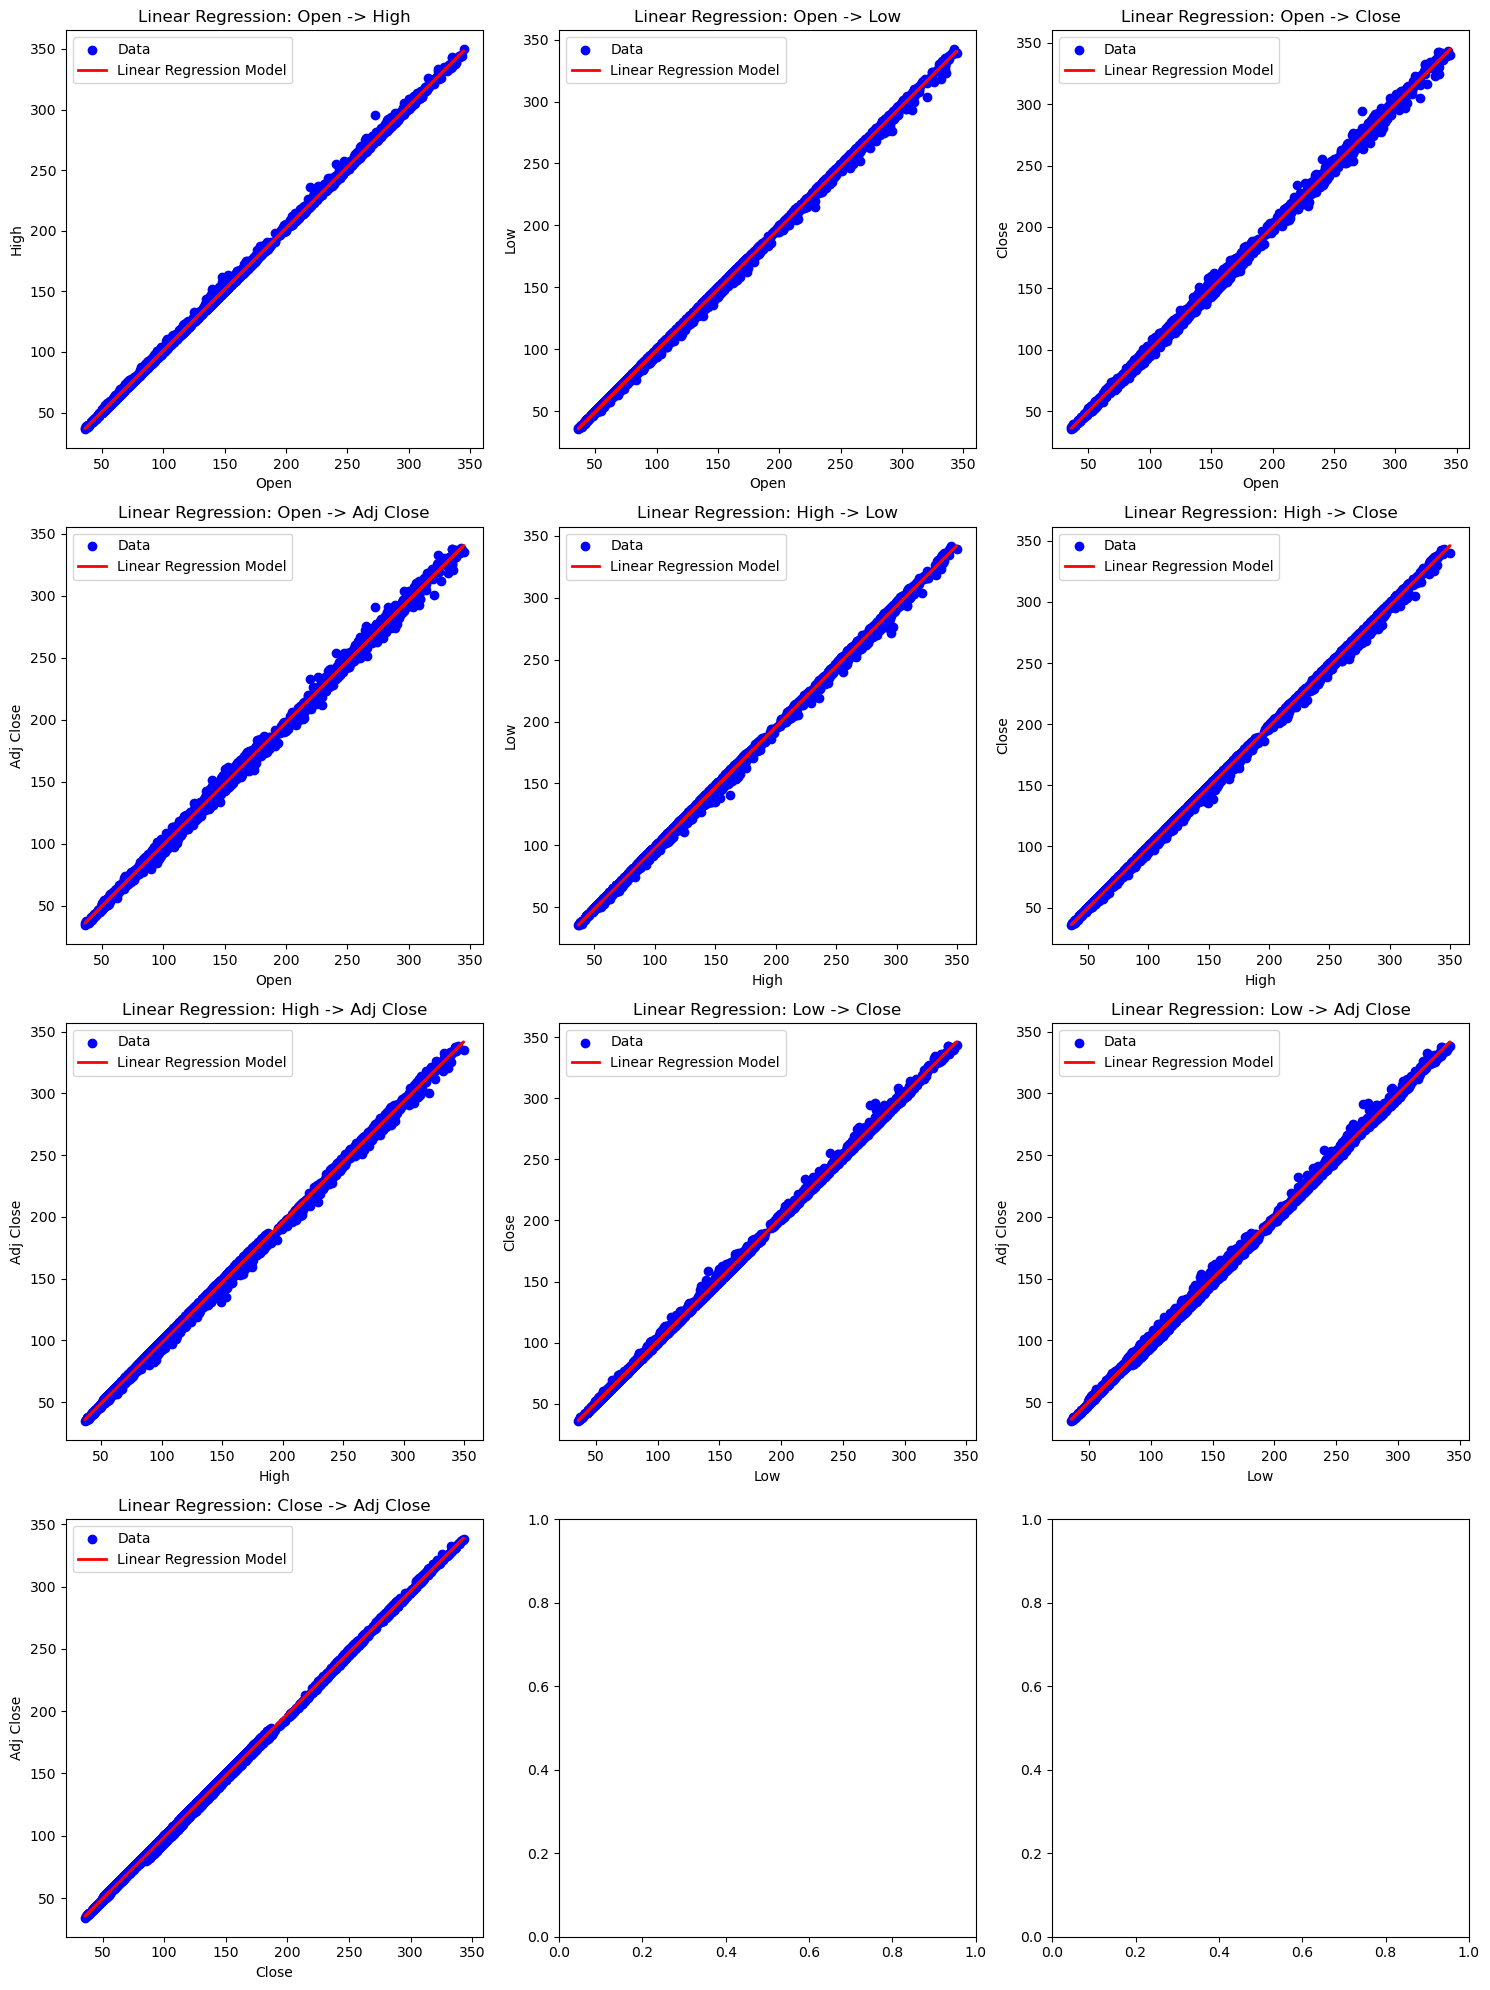

In [21]:
# Define the sets of data for regression
regression_sets = [
    ("Open", "High"),
    ("Open", "Low"),
    ("Open", "Close"),
    ("Open", "Adj Close"),
    ("High", "Low"),
    ("High", "Close"),
    ("High", "Adj Close"),
    ("Low", "Close"),
    ("Low", "Adj Close"),
    ("Close", "Adj Close")
]

# Determine the number of subplots
num_subplots = len(regression_sets)

# Calculate the number of rows and columns for the subplots
num_rows = (num_subplots - 1) // 3 + 1
num_cols = min(num_subplots, 3)

# Set up the subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

# Iterate over each set and perform linear regression
for i, (feature, dependence) in enumerate(regression_sets):
    row = i // num_cols
    col = i % num_cols

    X = df[feature].values.reshape(-1, 1)
    y = df[dependence].values

    # Create and fit the linear regression model
    model = LinearRegression()
    model.fit(X, y)

    # Generate predictions
    y_pred = model.predict(X)

    # Plot the data and model
    ax = axs[row, col]
    ax.scatter(X, y, color='blue', label='Data')
    ax.plot(X, y_pred, color='red', linewidth=2, label='Linear Regression Model')
    ax.set_xlabel(feature)
    ax.set_ylabel(dependence)
    ax.set_title(f"Linear Regression: {feature} -> {dependence}")
    ax.legend()

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plots
plt.show()

In [28]:
# sanity check  

# Make a final model object
model = LinearRegression(copy_X=True)

# Fit the model on the entire training set
model.fit(X_train, y_train)

# Print the training set performance
train_mse = mean_squared_error(y_train, model.predict(X_train))
print("Training set MSE:", np.round(train_mse, 2))

# Print the test set performance
test_mse = mean_squared_error(y_test, model.predict(X_test))
print("Test set MSE:", np.round(test_mse, 2))

Training set MSE: 3.18
Test set MSE: 3.21


There could be several reasons why a linear regression model may not perform well even when the data appears linear in distribution:

1. Non-linearity in the relationship: Although the data may appear linear in distribution, there could be underlying non-linear relationships between the independent variables and the dependent variable. In such cases, a linear regression model may not be able to capture the true relationship accurately.

2. Violation of assumptions: Linear regression assumes certain conditions, such as linearity, independence, homoscedasticity, and absence of multicollinearity. If these assumptions are violated in the data, the model's performance may be affected.

3. Outliers: Outliers in the data can have a significant impact on the regression model's performance. If there are influential outliers that do not conform to the linear relationship, the model may not generalize well to unseen data.

4. Missing relevant features: Linear regression assumes that all relevant features are included in the model. If important features are omitted, the model may not capture the full complexity of the relationship between the independent variables and the dependent variable.

5. Insufficient data: If the dataset is small, the model may not have enough information to accurately estimate the parameters and make reliable predictions. Increasing the amount of data can help improve the model's performance.

6. Noise in the data: Even if the data appears linear in distribution, there may still be inherent noise present. This noise can introduce random variations that make it challenging for the model to accurately estimate the underlying relationship.

To perform a **backtest** on the linear regression model, you can use the historical data to simulate trading and evaluate the model's performance. Here's a general outline of the steps you can follow:

1. Define the trading strategy: Determine the rules for buying and selling based on the model's predictions. For example, you could buy when the predicted price is higher than the current price and sell when the predicted price is lower.

2. Set up initial capital: Decide on the initial amount of capital you will allocate for trading.

3. Iterate over the historical data: Starting from the beginning of the dataset, simulate trading by following the defined strategy. Keep track of the portfolio value, including cash and holdings.

4. Calculate returns and performance metrics: At the end of the backtest, calculate the returns generated by the trading strategy and evaluate performance metrics such as annualized return, Sharpe ratio, maximum drawdown, etc.

In [14]:
# backtest on this model 

capital = 10000  # Initial capital
portfolio_value = [capital]  # List to store portfolio value over time
positions = 0  # Number of shares held

# Iterate over the historical data
for i in range(len(X)):
    price = X[i]  # Current price
    predicted_price = model.predict(price.reshape(-1, 1))[0]  # Predicted price

    # Buy or sell based on the predicted price
    if predicted_price > price:
        # Buy shares
        shares_to_buy = capital // price
        positions += shares_to_buy
        capital -= shares_to_buy * price
    elif predicted_price < price and positions > 0:
        # Sell shares
        capital += positions * price
        positions = 0

    # Calculate the portfolio value at each time step
    portfolio_value.append(capital + positions * price)

# Calculate the returns and performance metrics
returns = (portfolio_value[-1] - capital) / capital
annualized_return = ((1 + returns) ** (252 / len(X))) - 1  # Assuming 252 trading days in a year

print("Backtest Results:")
print(f"Initial Capital: ${capital}")
print(f"Final Portfolio Value: ${portfolio_value[-1]}")
print(f"Returns: {returns[0]:.2%}")
print(f"Annualized Return: {annualized_return[0]:.2%}")

Backtest Results:
Initial Capital: $10000
Final Portfolio Value: $[10000.]
Returns: 0.00%
Annualized Return: 0.00%


The backtest results indicate that the initial capital of `$10,000` remained unchanged throughout the backtesting period. The final portfolio value is also `$10,000`, which means there was no profit or loss generated by the trading strategy.

The returns are calculated as 0.00%, indicating that there was no return on the investment. This means that the trading strategy did not generate any profits during the backtesting period.

The annualized return is also calculated as 0.00%. Annualized return measures the average yearly return on the investment. In this case, since there were no profits generated, the annualized return is also 0.00%.

Overall, based on the backtest results, the trading strategy did not perform well and did not generate any profits. It's important to review and analyze the strategy, make necessary adjustments, and consider different approaches to improve its performance.